## This notebook reloads previously saved models and prints the evaluation for comparison

In [1]:
# Imports

import tensorflow as tf
import numpy as np
import pandas as pd

import os

import sys
sys.path.append('..')
from helperfunctions import modelhelper as mh

TARGET_VAR = "dx_tertiary"
IMAGE_SIZE = (224, 224) # Change to fit your model

In [2]:
MODEL_PATH = "../models/"

In [3]:
# Load test_df from file
test_df = pd.read_csv("../data/processed/test_from_Metadata_processed.csv")

In [4]:
# List all the models in MODEL_PATH
model_list = os.listdir(MODEL_PATH)

# just keep elements with -h5 extension
model_list = [model for model in model_list if model[-6:] == "343.h5"]

In [5]:
custom_objects = {
    'f1_score': mh.f1_score,
    'focal_loss': mh.focal_loss_multiclass,
    #add more if needed
}

Loading file: 'model_best-epoch_2023-10-13 15:25:01.255343.h5'
Evaluation model: 'Resnet50_tertiary_new_setup_huesaturation_l2_02_noDensenodrop_batch8_rotation15_900samples'...
Image size: (224, 224)
Target variable is set to: dx_tertiary


 > Evaluating model Resnet50_tertiary_new_setup_huesaturation_l2_02_noDensenodrop_batch8_rotation15_900samples:
 > Loading test images...
 > Test images loaded.


 > Converting labels to one hot format...
 > Getting model predictions...
32/32 [==============================] - 30s 917ms/step
 > Model predictions obtained.
 > Macro AUC: 0.9435005586290343
 > Micro AUC: 0.959777550687049


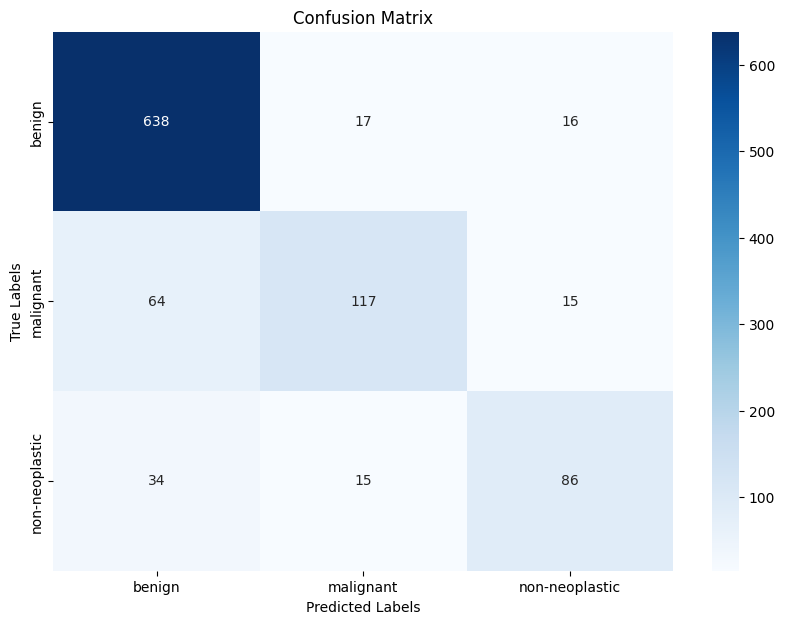



 > Computing classification report...
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       671
           1       0.79      0.60      0.68       196
           2       0.74      0.64      0.68       135

    accuracy                           0.84      1002
   macro avg       0.80      0.73      0.76      1002
weighted avg       0.83      0.84      0.83      1002

 > Evaluating model on test set...
32/32 [==============================] - 33s 1s/step - loss: 0.5390 - accuracy: 0.8393 - f1_score: 0.8424
loss: 0.5390148162841797
accuracy: 0.8393213748931885
f1_score: 0.8424290418624878
 > Done.




In [6]:
for file_name in model_list:
    # load the model
    model = tf.keras.models.load_model(MODEL_PATH + file_name, custom_objects=custom_objects)
    print(f"Loading file: '{file_name}'")
    # get the model name
    model_name = model.name
    print(f"Evaluation model: '{model_name}'...")
    # get the image dimension from the loaded model
    IMAGE_SIZE = model.input_shape[1:3]
    print(f"Image size: {IMAGE_SIZE}")
    # get the target variable from global variable
    print(f"Target variable is set to: {TARGET_VAR}")
    print("\n")
    mh.model_accuracy_on_test(model, test_df, TARGET_VAR, IMAGE_SIZE)
    
    print("===="*10)
    print("\n")

In [7]:
test_df.shape

(1002, 11)